<a href="https://colab.research.google.com/github/latruonghai/CS114.K21/blob/master/Regconize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [14]:
import pickle
"""with open('/content/gdrive/My Drive/ML1/lr.sav','rb') as f:
  model_lr = pickle.load(open(f))"""
model_lr = pickle.load(open('/content/gdrive/My Drive/ML1/lr.sav','rb'))
model_svc = pickle.load(open('/content/gdrive/My Drive/ML1/svc.sav','rb'))

In [43]:
import CropFace
import os
import cv2
from skimage.feature import hog
from skimage import exposure
from skimage.color import rgb2gray
import numpy as np

from google.colab.patches import cv2_imshow
path_train = 'gdrive/My Drive/Train'
path_test = 'gdrive/My Drive/Test'


In [46]:
def crop_face(path):
  faceCasCade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
  cap = cv2.VideoCapture(0)

  # Doc hinh

  img = cv2.imread(path)
  img  = cv2.resize(img,(400,int(img.shape[0]*400/img.shape[1])))
  img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
  img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
  # convert the YUV image back to RGB format
  img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
      #grayImag = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  face = faceCasCade.detectMultiScale(
          img_output,
          scaleFactor = 1.1,
          minNeighbors = 5,
          minSize = (30,30))
      #Vẽ các đường màu xanh lá quanh khuôn mặt
  for (x,y,w,h) in face:
    #sampleNum=sampleNum+1
    image = img[y-14:y+h+14,x-14:x+w+14]
          #Lưu ảnh khuôn mặt vào thư mục có tên(creatình
          #if not os.path.exists(path +'/'+createf): os.mkdir(path +'/'+createf)
          # Thểm ảnh xoay
          # Thêm ảnh đã cắt
          #cv2.imwrite(path+'/'+createf+"/"+name_file+'-'+ str(sampleNum) + ".jpg", cv2.resize(image,(216,216)))
      # Hiển thị ra màn hình
    #cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0), 2)
          #if sampleNum>200:
              #break
  #cv2_imshow(image)
  return image

def read(img):
  #file_name = "131.jpg"
  #img = io.imread(file_name)
        
  img = cv2.resize(img,(216,216))
  img = rgb2gray(img)
        # Chuyen hinh anh ve dang cac dang object
  fd_perer, imgs_per = hog(img, orientations=8, pixels_per_cell=(8, 8),
              cells_per_block=(3, 3), visualize=True)
  imgs_per = exposure.rescale_intensity(imgs_per,in_range = (0,0.04))
        #img_canny = canny(img, sigma=2)
        #hog()

        #imgss = np.round(img.flatten(), 2)
        #print(imgss)
  imgs = np.reshape(imgs_per,216*216)
  return np.round(np.asarray([imgs]),2)

In [53]:
paths = 'ST2.jpg'
image = cv2.imread(paths)
img = crop_face(paths)
test_x = read(img)
pred_lr = model_lr.predict(test_x)
pred_svc = model_svc.predict(test_x)

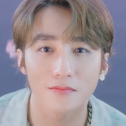

MTP 
# LR


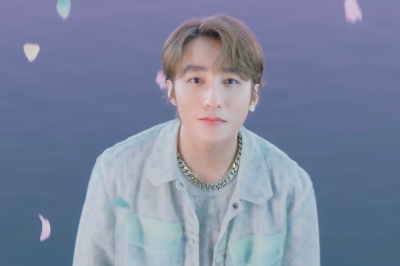

In [54]:
cv2_imshow(img)
print(pred_lr[0],'\n# LR')
cv2_imshow(cv2.resize(image,(400,int(image.shape[0]*400/image.shape[1]))))

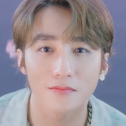

MTP 
# SVC


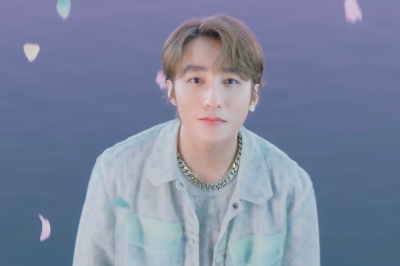

In [55]:
cv2_imshow(img)
print(pred_svc[0],'\n# SVC')
cv2_imshow(cv2.resize(image,(400,int(image.shape[0]*400/image.shape[1]))))